<a href="https://colab.research.google.com/github/EdioHub/Celsius_to_Fahrenheit_Perceptron/blob/main/projeto_celsius_fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1-Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.14.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2- Importação da base de dados

In [27]:
temp_df = pd.read_csv("/content/Celsius-to-Fahrenheit.csv")

In [8]:
temp_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [9]:
temp_df.tail(5)

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [10]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [11]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3- Visualização da base de dados

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

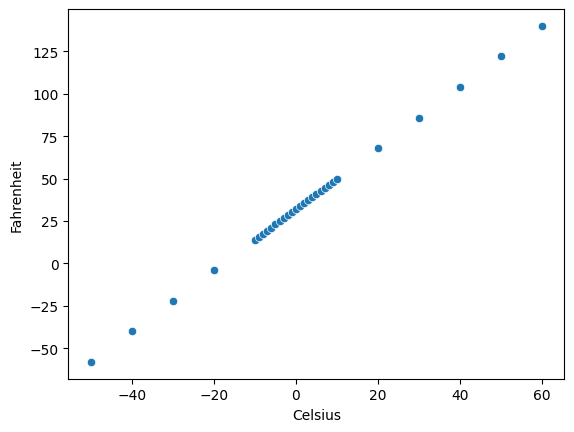

In [12]:
sns.scatterplot(x=temp_df['Celsius'], y=temp_df['Fahrenheit'])

# Etapa 4-Configuração da base de dados de treinamento

In [13]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']

In [14]:
X_train.shape

(30,)

In [15]:
y_train.shape

(30,)

# Etapa 5- Construção e treinamento do modelo

In [16]:
model =tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss = 'mean_squared_error')

In [21]:
epochs_hist = model.fit(X_train, y_train, epochs = 500)# erro brm pequeno

Epoch 1/500
1/1 [==============================] - 0s 13ms/step - loss: 7.0866
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 6.9867
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 6.8881
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 6.7907
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 6.6946
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 6.5997
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 6.5060
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 6.4136
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 6.3223
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 6.2322
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 6.1433
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 6.0556
Epoch 13/500
1/1 [==============================] - 0s 9

# Etapa 6- Avaliação do modelo

In [22]:
epochs_hist.history.keys()

dict_keys(['loss'])

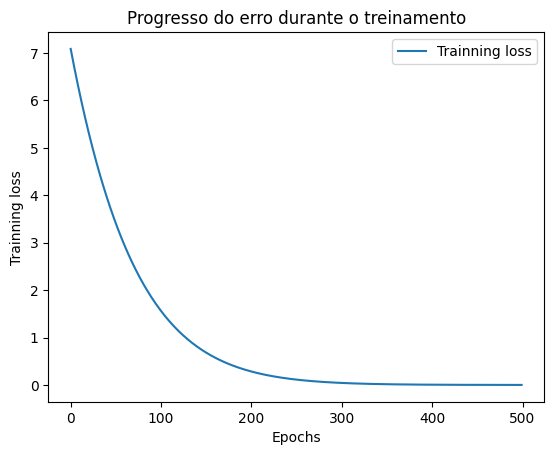

In [23]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progresso do erro durante o treinamento')
plt.xlabel('Epochs')
plt.ylabel('Trainning loss')
plt.legend(['Trainning loss'])

esses valores são o resultado obtido bias 32 e peso 1.8 pelo treinamento e é igual a fórmula original

T(f)=t(c)*(9/5)+32


In [24]:
model.get_weights()

[array([[1.8000898]], dtype=float32), array([31.977428], dtype=float32)]

In [25]:
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

1/1 [==============================] - 0s 94ms/step


array([[49.978325]], dtype=float32)

In [26]:
temp_f1 = (9/5 * temp_c) + 32
temp_f1

50.0




Conclusão:

Este primeiro projeto do curso de Deep Learning na Udemy serviu como uma introdução  à implementação de percepuma rede neural , atuando principalmente como um modelo didático. No contexto da conversão de temperaturas de Celsius para Fahrenheit, a utilização de uma rede neural se revela desnecessária, uma vez que a fórmula matemática T(f) = t(c) * (9/5) + 32 é suficiente para obter resultados precisos de conversão.

No entanto, a implementação da rede neural proporcionou uma oportunidade de aprendizado prática e ilustrativa, permitindo uma comparação entre os resultados obtidos pela fórmula matemática e os gerados pela rede neural. Embora a rede neural tenha se aproximado dos valores corretos, a fórmula matemática permanece a escolha mais eficiente e direta para a tarefa específica de conversão de temperaturas.

Para ilustrar, consideremos o exemplo em que a temperatura em Celsius (temp C) é igual a 10 graus. Pela aplicação da fórmula, obtemos uma temperatura em Fahrenheit (temp F) de:

T(f) = 10 * (9/5) + 32
T(f) = 18 + 32
T(f) = 50 graus Fahrenheit

Enquanto isso, pela rede neural, a temperatura em Fahrenheit é aproximadamente 49.978325 graus Fahrenheit, o que demonstra que a rede neural se aproxima do valor correto, mas a fórmula matemática fornece um resultado mais preciso e eficiente para essa conversão específica.